In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import urllib.request
from PIL import Image

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("diamonds_train.csv", index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40345 entries, 0 to 40344
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40345 non-null  float64
 1   cut      40345 non-null  object 
 2   color    40345 non-null  object 
 3   clarity  40345 non-null  object 
 4   depth    40345 non-null  float64
 5   table    40345 non-null  float64
 6   x        40345 non-null  float64
 7   y        40345 non-null  float64
 8   z        40345 non-null  float64
 9   price    40345 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.4+ MB


In [4]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


In [5]:
df['cut'].unique()

array(['Ideal', 'Very Good', 'Premium', 'Good', 'Fair'], dtype=object)

In [6]:
df['cut'].replace({'Good':1, 
                          'Very Good':2,
                          'Fair':3,
                          'Ideal':4,
                          'Premium':5
                         }, inplace=True)

In [7]:
df['color'].unique()

array(['H', 'D', 'F', 'G', 'I', 'E', 'J'], dtype=object)

In [8]:
df['color'].replace({'J':1, 
                          'I':2,
                          'H':3,
                          'G':4,
                          'F':5,
                          'E':6,
                          'D':7
                         }, inplace=True)

In [9]:
df['clarity'].unique()

array(['VS2', 'VVS2', 'VS1', 'IF', 'SI1', 'SI2', 'VVS1', 'I1'],
      dtype=object)

In [10]:
df['clarity'].replace({'I1':1,
                          'SI1':2,
                          'SI2':3,
                          'VS1':4,
                          'VS2':5,
                          'VVS1':6,
                          'VVS2':7,
                          'IF':8
                         }, inplace=True)

In [11]:
df['area'] = df['x'] / df['y']

In [12]:
# Treating all the nominal variables at once using dummy variables
df_Numeric = pd.get_dummies(df)

# Adding Target Variable to the data
df_Numeric = df_Numeric[['carat', 'x','y','z','cut', 'color', 'clarity', 'price', 'area', 'depth']]

# Printing sample rows
df_Numeric.head()

,carat,x,y,z,cut,color,clarity,price,area,depth
0,1.21,6.73,6.70,4.23,4,3,5,6134,1.004478,63.0
1,0.28,4.14,4.17,2.66,2,7,7,532,0.992806,64.0
2,0.42,4.86,4.82,2.96,5,5,4,1103,1.008299,61.2
3,0.26,4.16,4.12,2.53,4,3,8,600,1.009709,61.1
4,1.10,6.52,6.55,4.14,1,4,2,4997,0.995420,63.4


In [13]:
df_Numeric.describe()

,carat,x,y,z,cut,color,clarity,price,area,depth
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40339.000000,40345.000000
mean,0.795652,5.726106,5.730217,3.535136,3.504251,4.413236,4.090197,3924.089924,0.999350,61.750413
std,0.470806,1.118690,1.148584,0.693662,1.326595,1.695243,1.774441,3982.000515,0.013058,1.424219
min,0.200000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,326.000000,0.000000,43.000000
25%,0.400000,4.710000,4.720000,2.910000,2.000000,3.000000,2.000000,948.000000,0.992565,61.000000
50%,0.700000,5.690000,5.710000,3.520000,4.000000,4.000000,4.000000,2395.000000,0.995717,61.800000
75%,1.040000,6.540000,6.530000,4.030000,5.000000,6.000000,5.000000,5313.000000,1.006932,62.500000
max,4.010000,10.020000,58.900000,8.060000,5.000000,7.000000,8.000000,18818.000000,1.601415,79.000000


In [14]:
df_Numeric.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,x,y,z,cut,color,clarity,price,area,depth
4960,2.80,8.90,8.85,0.0,1,4,3,18788,1.005650,63.8
5127,2.20,8.42,8.37,0.0,5,3,2,17265,1.005974,61.2
6571,1.56,0.00,0.00,0.0,4,4,5,12800,NaN,62.2
10971,1.12,6.71,6.67,0.0,5,4,1,2383,1.005997,60.4
12572,1.10,6.50,6.47,0.0,5,4,3,3696,1.004637,63.0
15252,1.20,0.00,0.00,0.0,5,7,6,15686,NaN,62.1
15518,1.15,6.88,6.83,0.0,4,4,5,5564,1.007321,59.2
18027,1.07,0.00,6.62,0.0,4,5,3,4954,0.000000,61.6
18658,1.01,6.50,6.47,0.0,5,5,3,3837,1.004637,59.2
20916,1.01,6.66,6.60,0.0,5,3,1,3167,1.009091,58.1


In [15]:
df_Numeric = df_Numeric[df_Numeric['area'].notna()]

In [16]:
df_Numeric.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,x,y,z,cut,color,clarity,price,area,depth
4960,2.80,8.90,8.85,0.0,1,4,3,18788,1.005650,63.8
5127,2.20,8.42,8.37,0.0,5,3,2,17265,1.005974,61.2
10971,1.12,6.71,6.67,0.0,5,4,1,2383,1.005997,60.4
12572,1.10,6.50,6.47,0.0,5,4,3,3696,1.004637,63.0
15518,1.15,6.88,6.83,0.0,4,4,5,5564,1.007321,59.2
18027,1.07,0.00,6.62,0.0,4,5,3,4954,0.000000,61.6
18658,1.01,6.50,6.47,0.0,5,5,3,3837,1.004637,59.2
20916,1.01,6.66,6.60,0.0,5,3,1,3167,1.009091,58.1
24846,2.18,8.49,8.45,0.0,5,3,3,12631,1.004734,59.4
28570,1.50,7.15,7.04,0.0,1,4,1,4731,1.015625,64.0


<AxesSubplot:>

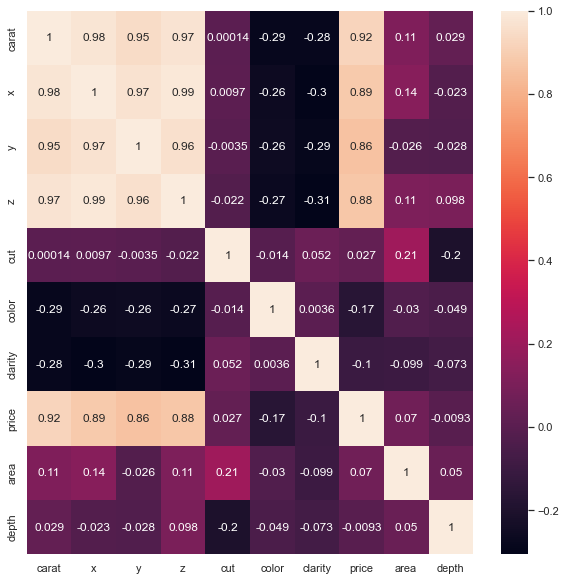

In [17]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(df_Numeric.corr(), annot=True)

-----------------------------------------------------------------------------------------------------------------

### Pasos que si o si debéis realizar para poder participar en la competición:

### 1. Definir X e y

In [18]:
Target='price'
Predictors=['carat', 'x', 'y', 'z', 'cut', 'color', 'clarity', 'area', 'depth']

X = df_Numeric[Predictors].values
y = df_Numeric[Target].values

### 2. Dividir X_train, X_test, y_train, y_test

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(38322, 9)
(38322,)
(2017, 9)
(2017,)


In [21]:
X_train

array([[ 0.73      ,  5.76      ,  5.72      , ...,  3.        ,
         1.00699301, 63.1       ],
       [ 0.27      ,  4.13      ,  4.16      , ...,  8.        ,
         0.99278846, 63.        ],
       [ 1.16      ,  6.72      ,  6.64      , ...,  3.        ,
         1.01204819, 62.4       ],
       ...,
       [ 0.54      ,  5.17      ,  5.21      , ...,  5.        ,
         0.99232246, 63.        ],
       [ 0.31      ,  4.37      ,  4.39      , ...,  7.        ,
         0.99544419, 61.        ],
       [ 0.47      ,  5.09      ,  5.06      , ...,  2.        ,
         1.00592885, 58.5       ]])

### 3. Asignar el modelo (vacío) a una variable
Aquí meteríais los parámetros. 

**Consejo**: Usa GridSearch y vuélvete loca o loco probando modelos e hiperparámetros.

In [22]:
model = LinearRegression()

Siempre hay tiempo para una historia:
https://catboost.ai/docs/concepts/python-reference_catboostregressor.html

### 4. Entrenar el modelo con X_train, y_train

In [23]:
model.fit(X_train, y_train)

LinearRegression()

### 5. Predecir con el modelo ya entrenado con X_test

In [24]:
predictions = model.predict(X_test)
print(predictions)

[ 103.79172683 2758.85969982 4616.99065919 ... 4630.05528822 7151.38573494
 4998.30087655]


### 6. Sacar métricas, valorar el modelo 

Recuerdo que en la competición se va a evaluar con la métrica de RMSE.

In [25]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

In [26]:
np.sqrt(mean_squared_error(y_test, predictions))

1371.624135321618

In [27]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 100,verbose = 1)
y_pred = model.predict(X_test)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % model.score(X_test, y_test))

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



####### Linear Regression #######
Score : 0.8762
RMSE: 1371.624135321618


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


In [28]:
from sklearn.linear_model import Lasso

model_la = Lasso(normalize=True)
model_la.fit(X_train , y_train)
accuracies = cross_val_score(estimator = model_la, X = X_train, y = y_train, cv = 10,verbose = 1)
y_pred = model_la.predict(X_test)
print('')
print('###### Lasso Regression ######')
print('Score : %.4f' % model_la.score(X_test, y_test))

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


###### Lasso Regression ######
Score : 0.8669
RMSE: 1422.2562206026125


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [29]:
from sklearn.linear_model import Ridge

model_rr = Ridge(normalize=True)
model_rr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = model_rr, X = X_train, y = y_train, cv = 10,verbose = 1)
y_pred = model_rr.predict(X_test)
print('')
print('###### Ridge Regression ######')
print('Score : %.4f' % model_rr.score(X_test, y_test))

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### Ridge Regression ######
Score : 0.7942
RMSE: 1768.213060769709


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [30]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)
model_gbr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = model_gbr, X = X_train, y = y_train, cv = 10,verbose = 1)
y_pred = model_gbr.predict(X_test)
print('')
print('###### Gradient Boosting Regression #######')
print('Score : %.4f' % model_gbr.score(X_test, y_test))


print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

      Iter       Train Loss   Remaining Time 
         1    14043094.9969            1.58s
         2    12454645.4723            1.47s
         3    11134631.6923            1.49s
         4     9953780.3790            1.42s
         5     8981072.1565            1.39s
         6     8102523.5114            1.33s
         7     7381326.3185            1.29s
         8     6748354.2961            1.27s
         9     6186547.1202            1.25s
        10     5716100.7632            1.24s
        20     3178078.2541            1.05s
        30     2359246.7634            0.90s
        40     2052823.0839            0.77s
        50     1863088.2071            0.64s
        60     1720567.7041            0.51s
        70     1610687.7160            0.38s
        80     1524722.8365            0.25s
        90     1455947.4271            0.13s
       100     1401135.7160            0.00s
      Iter       Train Loss   Remaining Time 
         1    14043508.5653            1.19s
        

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


        20     3175807.6449            0.91s
        30     2357159.5492            0.79s
        40     2049806.7697            0.68s
        50     1860006.2731            0.56s
        60     1716478.0038            0.45s
        70     1606278.7989            0.34s
        80     1520081.5939            0.22s
        90     1451043.9009            0.11s
       100     1395887.2004            0.00s
      Iter       Train Loss   Remaining Time 
         1    14060193.7473            1.19s
         2    12473517.2555            1.22s
         3    11152049.2138            1.23s
         4     9969114.1523            1.20s
         5     8996008.8911            1.22s
         6     8116314.0867            1.18s
         7     7394187.7197            1.16s
         8     6763427.9142            1.15s
         9     6198253.6379            1.13s
        10     5729326.8995            1.12s
        20     3187949.6445            0.95s
        30     2367168.0691            0.82s
        4

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   11.9s finished


In [31]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = model_rf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = model_rf.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % model_rf.score(X_test, y_test))

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir con el dataset de predicción 

Definición de **modelo que está listo**. 

_Tras hacer suficientes pruebas, analizar los datos, hacer feature engineering, probar diferentes modelos con diferentes parámetros, es con este con el que observo mejores métricas y menos overfitting. ¡Cuidado con el overfitting aquí! Si vuestro modelo aprende muy bien de estos datos pero hay overfitting cuando le pasemos los datos desconocidos de `diamonds_test.csv` nos arriesgamos a que digamos, no salga lo esperado._

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `diamonds_train.csv` al completo.

**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**

Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 2. Carga los datos de `diamonds_test.csv` para predecir.

**¿De dónde saco `diamonds_test.csv`?**

In [32]:
X_pred = pd.read_csv("diamonds_test.csv", index_col = 0)
X_pred.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


In [33]:
X_pred.shape

(13449, 9)

In [34]:
X_pred['cut'].replace({'Good':1, 
                          'Very Good':2,
                          'Fair':3,
                          'Ideal':4,
                          'Premium':5
                         }, inplace=True)

In [35]:
X_pred['color'].replace({'J':1, 
                          'I':2,
                          'H':3,
                          'G':4,
                          'F':5,
                          'E':6,
                          'D':7
                         }, inplace=True)

In [36]:
X_pred['clarity'].replace({'I1':1,
                          'SI1':2,
                          'SI2':3,
                          'VS1':4,
                          'VS2':5,
                          'VVS1':6,
                          'VVS2':7,
                          'IF':8
                         }, inplace=True)

In [37]:
X_pred['area'] = X_pred['x'] / X_pred['y']

In [38]:
X_pred = X_pred[X_pred['area'].notna()]

In [39]:
# Treating all the nominal variables at once using dummy variables
df_Numeric = pd.get_dummies(X_pred)

# Adding Target Variable to the data
df_Numeric = df_Numeric[['carat', 'x','y','z','cut', 'color', 'clarity', 'area', 'depth']]

# Printing sample rows
df_Numeric.head()

,carat,x,y,z,cut,color,clarity,area,depth
0,0.30,4.41,4.43,2.65,4,3,3,0.995485,60.0
1,0.34,4.52,4.46,2.79,4,7,8,1.013453,62.1
2,1.57,7.58,7.55,4.56,2,2,5,1.003974,60.3
3,0.31,4.32,4.36,2.68,4,3,5,0.990826,61.8
4,1.51,7.26,7.21,4.63,1,2,6,1.006935,64.0


### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

In [40]:
# respuestas

In [41]:
predictions_submit = model_rf.predict(df_Numeric)
predictions_submit

array([  409.05 ,  1332.795,  9876.94 , ..., 15386.92 ,  9941.03 ,
         718.83 ])

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

**¿De dónde saco `sample_submission.csv`?**

In [42]:
sample = pd.read_csv("sample_submission.csv")

In [43]:
sample.head()

,id,price
0,0,12132
1,1,11786
2,2,14684
3,3,15425
4,4,6724


In [44]:
sample.shape

(13449, 2)

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [45]:
submission = pd.DataFrame({"id": range(len(predictions_submit)), "price": predictions_submit})

In [46]:
submission.head()

,id,price
0,0,409.050
1,1,1332.795
2,2,9876.940
3,3,493.330
4,4,8310.340


In [47]:
submission.shape

(13449, 2)

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [48]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [49]:
chequeator(submission)

You're ready to submit!
